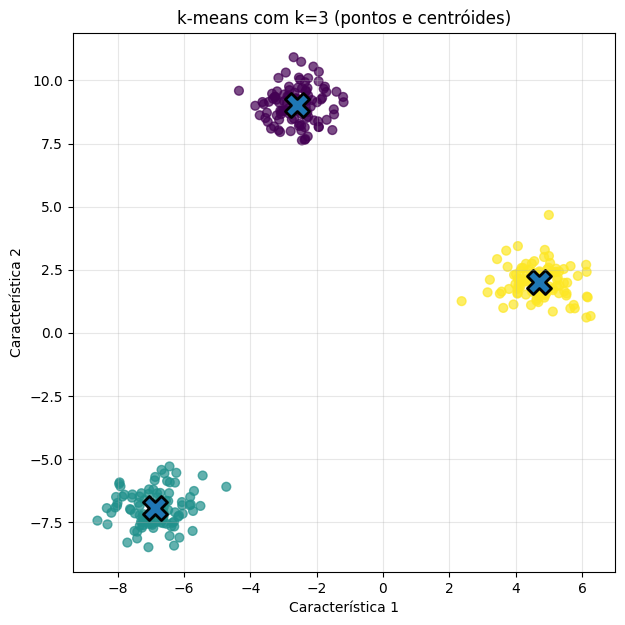

Cluster 0: 100 pontos
Cluster 1: 100 pontos
Cluster 2: 100 pontos
Centróides:
 [[-2.59602216  9.03478469]
 [-6.88259841 -6.95282178]
 [ 4.71493601  1.9993669 ]]


In [1]:
# ========================================
# Exemplo simples e pedagógico de k-means
# ========================================

# 1) Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 2) Gerar um conjunto de dados simples, com 3 grupos bem separados
#    - n_samples: número de pontos
#    - centers: quantos "verdadeiros" grupos queremos simular
#    - cluster_std: dispersão dos pontos em cada grupo (menor = mais juntos)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=42)

# 3) Definir o número de clusters k (vamos pedir 3)
k = 3

# 4) Criar o modelo k-means
#    - n_clusters=k: quantos grupos queremos encontrar
#    - random_state: para resultados reprodutíveis
#    - n_init: quantas inicializações diferentes (melhor estabilidade)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# 5) Ajustar o modelo aos dados e obter as etiquetas (cluster de cada ponto)
labels = kmeans.fit_predict(X)

# 6) Obter as coordenadas dos centróides (um por cluster)
centroids = kmeans.cluster_centers_

# 7) Visualizar resultados
plt.figure(figsize=(7, 7))

# Desenhar cada cluster com uma cor diferente (as cores são atribuídas pelas labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, alpha=0.7)

# Desenhar os centróides como “X” maiores para se destacarem
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=300, linewidths=2, edgecolors="black")

plt.title("k-means com k=3 (pontos e centróides)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True, alpha=0.3)
plt.show()

# 8) (Opcional) Mostrar as coordenadas dos centróides e o tamanho de cada cluster
unique, counts = np.unique(labels, return_counts=True)
for cl, cnt in zip(unique, counts):
    print(f"Cluster {cl}: {cnt} pontos")
print("Centróides:\n", centroids)



## 🧠 Explicação (em 30 segundos)

* **Objetivo do k-means:** separar pontos em $k$ grupos, de forma que cada ponto fique **perto** do centróide do seu grupo.
* **Como funciona (intuição):**

  1. Escolhe $k$ centróides iniciais (aleatórios).
  2. Atribui cada ponto ao centróide mais próximo.
  3. Recalcula os centróides (média dos pontos de cada grupo).
  4. Repete 2–3 até estabilizar.
* **Quando usar:** quando queremos **segmentar** dados sem rótulos (ex.: segmentação de clientes por comportamento).
* **Cuidados:**

  * É sensível à **escala** das variáveis (normalizar ajuda).
  * Precisa que escolhamos $k$ (usar **elbow** ou **silhouette** como guia).
  * Prefere clusters “redondos” e separados.

Se quiseres, faço já uma **versão interativa** onde arrastas um “slider” para $k$ e o gráfico atualiza os clusters e centróides — ótimo para demonstração em aula.
